Jupyter Notebook to test the differnt conditions in the Graph class

In [202]:
%% autoreload 2


UsageError: Cell magic `%%` not found.


In [218]:
from search.graph import Graph
import pytest

# Graph Class


In [219]:
test_network = Graph("data/num_test.adjlist")
test_network.bfs("2", "11")

DiGraph with 11 nodes and 10 edges


['2', '5', '5', '9', '9', '11']

In [213]:
test_network = Graph("data/num_test.adjlist")
test_network.bfs("2", "4")

DiGraph with 11 nodes and 10 edges


['2', '4']

In [214]:
test_network = Graph("data/num_test.adjlist")
test_network.bfs("2", None)

DiGraph with 11 nodes and 10 edges


ValueError: End node None not found in graph

## Testing Graph Class

In [199]:
test_network = Graph("data/num_test.adjlist")
assert test_network.bfs("2", "11") == ['2', '5', '5', '9', '9', '11']
#assert test_network.bfs("2", "11") == ['2', '5', '10', '11'], "Error: within bfs should return 2, 5, 9, 11"


DiGraph with 11 nodes and 10 edges


In [200]:
tiny_network = Graph("data/tiny_network.adjlist")
assert tiny_network.bfs("Atul Butte","Marina Sirota") == ['Atul Butte', '30944313', '30944313', 'Marina Sirota']
#assert tiny_network.bfs("Atul Butte","Marina Sirota") == ['Atul Butte', '30944313', 'Marina Sirota'], "Error: within bfs should return Atul Butte, 30944313, Marina Sirota"


DiGraph with 30 nodes and 64 edges


['2', '5', '5', '9', '9', '11']

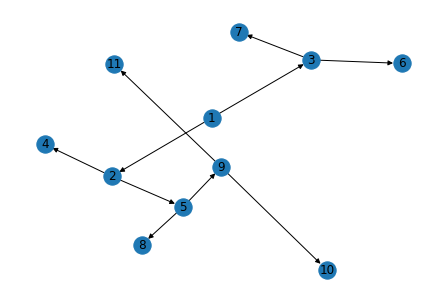

In [14]:
nx.draw(test_network.graph, with_labels=True)


# Testing the code


In [252]:
import pytest

In [284]:

def test_freebie_parser_1():
    """
    This one is a freebie
    DO NOT MODIFY THIS FUNCTION
    """
    assert True


def test_freebie_parser_2():
    """
    This too is a freebie
    DO NOT MODIFY THIS FUNCTION
    """
    assert 1 != 2

        
def test_bfs(Graph):
    """
    Write your unit test for your bft(Graph)
    class here. You should generate an instance of
    your Graph class and assert that it properly
    reads in the example adj list.
    """
    test_network = Graph("data/num_test.adjlist")
    #test_network.bfs("2", "11")

    assert test_network.bfs("2", "11") == ['2', '5', '5', '9', '9', '11']

    assert test_network.bfs("2", "11") == ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], "Error: the path is incorrect"


def test_bfs(Graph):
    """
    Write your unit test for your bft(Graph)
    class here. You should generate an instance of
    your Graph class and assert that it properly
    reads in the example adj list. This test should check
    for the case where there is no path between the start
    and end nodes.
    """
    test_network = Graph("data/num_test.adjlist")
    #test_network.bfs("3", "11")
    assert test_network.bfs("3", "11") == None

    assert test_network.bfs("3", "11") == [], "Error: this path should be empty"

    

    



In [ ]:
class Graph:
    """
    Class to contain a graph and your bfs function
    
    You may add any functions you deem necessary to the class
    """


    def __init__(self, filename) -> None:

        """
        Initialization of graph object 
        """

        self.graph = nx.read_adjlist(filename, create_using=nx.DiGraph, delimiter=";")
        #print(self.graph)

    def next_node(self, node, end=None):
        """
        Find the next node in the graph
        """
        if node == end:
            return print(end)
        else:
            return self.graph.neighbors(node)


    def bfs(self, start, end=None):
        """
        A recursive function that performs a breadth first traversal and pathfinding on graph G
        
        ArithmeticError:

        * If there's no end node input, return a list nodes with the order of BFS traversal
        * If there is an end node input and a path exists, return a list of nodes with the order of the shortest path
        * If there is an end node input and a path does not exist, return None
        """

        # ArithmeticError:
        if start not in self.graph.nodes():            # if start node is not in graph
            raise ValueError(f"Start node {start} not found in graph")
        
        elif end not in self.graph.nodes():            # if end node is not in graph
            raise ValueError(f"End node {end} not found in graph")

        elif start == end and self.graph.nodes():      # if start node is the same as end node
            raise ValueError(f"Start node {start} is the same as end node {end}")

        
        """
        Breath First Search - BFS Algorithm

        Obectives: 
            To find the shortest path between two nodes in a graph. 
            To traverse a graph in a breadth first manner.

        Algorithm:
            1. Start at the root node (start node)
            2. Explore all the neighbor nodes at the present depth
            3. Move on to the nodes at the next depth level (next neighbor)
            4. Repeat until the goal node is found or all nodes have been explored
            5. If the goal node is never found, return failure (no path exists)
        """
    
        queue = [start]                                    # initialize queue with start node
        visited = []                                       # initialize visited list
        path={}                                            # initialize path dictionary     
        path[start] = []                                   # add start node to path dictionary                

        for neighbor in self.next_node(start, end):         # for each neighbor of node
                    path[neighbor] = path[start] + [neighbor]   # add node to path list
        
        found = False

        while queue:
            node = queue.pop()                             # pop the first node in queue
            if node not in visited:                         # if node is not visited
                if node == end:
                    found = True                                # if node is end node
                    return path[node]                           # return path list

                if node not in visited:                         # if node is not visited
                    visited.append(node)       
                                    # add node to visited list
                    neighbors = self.next_node(node, end)
                    for neighbor in neighbors:                  # for each neighbor of node
                        path[neighbor] = path[node] + [node] + [neighbor] # add node to path list 
                        queue.append(neighbor)                  # add neighbors to queue

        # bfs tranversal
        if end is None:
            return visited                      # if no end node, return visited list

        if not found:
            return None                     # if no path exists, return None



